# Equivalente eléctrico del calor

Para esta practica se utilizó un calorímetro (el mismo que en sensores de temperatura), se considera como un sistema aislado. Para este caso se trabajo con agua dentro del elemento, un termómetro
y una resistencia de cerámica. Por efecto Joule se suministra calor al sistema, se hace pasar corriente a través de la resistencia para entregar calor al agua que reposa dentro del calorímetro. La expresión que relaciona estas cantidades es.

$$Q = (C_{a}m_{a}+C_{Ter}m_{Ter}) \Delta T$$

$$Q = C_{a}(m_{a} + M_{eq}) \Delta T$$

$$M_{eq} = \frac{C_{Ter}m_{Ter}}{C_{a}}$$

La constante $M_{eq}$ es una constante que se calcula para cada calorímetro en particular, que se denomina el equivalente en agua del calorímetro que representa una cantidad de agua que es análogo a la función del calorímetro dentro del sistema en estudio.



# Trabajo eléctrico 

La potencia del sistema eléctrico está dada por $P = IV$,entonces al energía suministrada al sistema está determinado por la resistencia, en un tiempo $t$ se tiene

$$\int_{0}I(t)\cdot V(t)dt \approx IVt = P_{elec}\cdot t $$

Lo cual es válido si se mantiene I y V aproximadamente constante

Sí expresamos el trabajo electrico $W_{ele}$ en Joules, podemos encontrar el valor requerido para generar una caloría. La cantidad de calorías entregadas al agua se calcula a través de la medición de la variación de la temperatura $\Delta T$ de la misma y su masa m_{a}, la cual es dada por :

$$Q = C_{a}(m_{a}+M_{eq}) \Delta T$$

# Los datos tomados

$m_{a} = (65 \pm 0.1)g$

$m_{c}=(65 \pm 0.1)g$ 



In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import stats
ca = 4.1813*274.15

ta = np.arange(0,320.,20)
T2 = np.array([26.,26.2,26.4,26.8,27.2,27.5,27.7,28.3,28.6,28.9,29.2,29.5,29.8,
              30.0,30.4,30.7])# 6W
T3 =np.array([31.,31.2,31.6,32.0,32.6,33.,33.3,33.6,34.2,34.6,35.,35.5,
             35.6,35.8,36.3,36.8])#7.7W
T4 = np.array([24.2,24.6,25.4,25.9,26.6,27.2,27.3,28.2,28.9,29.6,30.3,
              30.7,31.3,31.4,32.3,32.8]) #9.6W
T1 = np.array([32.3,32.5,32.6,32.7,33.,33.1,33.4,33.6,33.8,33.7,34.1,
              34.2,34.6,34.8,34.9,35.1])

PW1 = 2.
PW2 = 6.
PW3 = 7.7
PW4 = 9.6

W1 =PW1*300
W2 =PW2*300
W3 =PW3*300
W4 =PW4*300

# Definicion de los Delta

t = (np.roll(ta,-1)-ta)[:-1]
TW1 = (np.roll(T1,-1)-T1)[:-1]
TW2 = (np.roll(T2,-1)-T2)[:-1]
TW3 = (np.roll(T3,-1)-T3)[:-1]
TW4 = (np.roll(T4,-1)-T4)[:-1]

def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/(len(y)*xi2-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])


print ta
print W1,W2,W3,W4

[   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.
  240.  260.  280.  300.]
600.0 1800.0 2310.0 2880.0


# Potencia 1 ----> P = 2W

Pendiente 0.00948529411765 error 0.00254786118905
Punto de corte 32.2272058824 error 0.448597253445


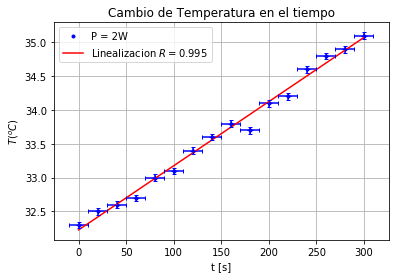

In [45]:
plt.plot(ta,T1,"b.", label = "P = 2W")
#plt.plot(ta,T2,"g.",label = "P = 6W")
#plt.plot(ta,T3,"r.",label = "P = 7.7")
#plt.plot(ta,T4,"k.",label = "P = 9.6")

T1Err = 0.05;taErr = 10
slope1, intercept1, r_value1, p_value1, std_err1 = sp.stats.linregress(ta,T1)
polynomial = np.poly1d([slope1, intercept1])
line = polynomial(ta)
plt.plot(ta, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value1)) 
plt.errorbar(ta, T1, T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("$T(^{o}C)$")
plt.title("Cambio de Temperatura en el tiempo")
plt.legend()


print "Pendiente", slope1, "error", Error_linealizacion(ta,T1)[1]
print "Punto de corte", intercept1, "error", Error_linealizacion(ta,T1)[0]
plt.savefig("2W")

# Potencia 1 ----> P = 6W

Pendiente 0.0161911764706 error 0.00433437016254
Punto de corte 25.8963235294 error 0.763144616624


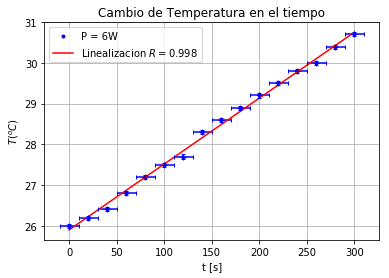

In [46]:
#plt.plot(ta,T1,"b.", label = "P = 2W")
plt.plot(ta,T2,"b.",label = "P = 6W")
#plt.plot(ta,T3,"r.",label = "P = 7.7")
#plt.plot(ta,T4,"k.",label = "P = 9.6")

T2Err= 0.05;taErr=10
slope2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(ta,T2)
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(ta)
plt.plot(ta, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value2)) 
plt.errorbar(ta, T2, T2Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("$T(^{o}C)$")
plt.title("Cambio de Temperatura en el tiempo")
plt.legend()


print "Pendiente", slope2, "error", Error_linealizacion(ta,T2)[1]
print "Punto de corte", intercept2, "error", Error_linealizacion(ta,T2)[0]
plt.savefig("6W")

 # Potencia 1 ----> P = 7.7W

Pendiente 0.0196102941176 error 0.00525426872276
Punto de corte 30.9397058824 error 0.925109471435


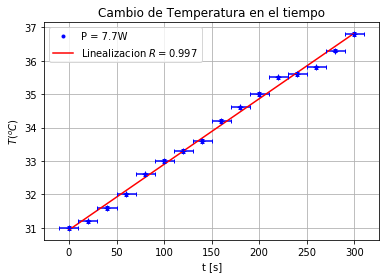

In [47]:
#plt.plot(ta,T1,"b.", label = "P = 2W")
#plt.plot(ta,T2,"g.",label = "P = 6W")
plt.plot(ta,T3,"b.",label = "P = 7.7W")
#plt.plot(ta,T4,"k.",label = "P = 9.6")

T3Err= 0.05;taErr=10
slope3, intercept3, r_value3, p_value3, std_err3 = sp.stats.linregress(ta,T3)
polynomial = np.poly1d([slope3, intercept3])
line = polynomial(ta)
plt.plot(ta, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value3)) 
plt.errorbar(ta, T3, T3Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("$T(^{o}C)$")
plt.title("Cambio de Temperatura en el tiempo")
plt.legend()


print "Pendiente", slope3, "error", Error_linealizacion(ta,T3)[1]
print "Punto de corte", intercept3, "error", Error_linealizacion(ta,T3)[0]
plt.savefig("77W")

#  Potencia 1 ----> P = 9.6W

Pendiente 0.0290808823529 error 0.00778854520752
Punto de corte 24.1816176471 error 1.37131489088


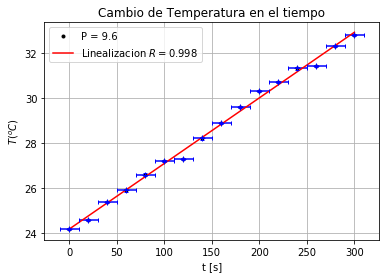

In [48]:
#plt.plot(ta,T1,"b.", label = "P = 2W")
#plt.plot(ta,T2,"g.",label = "P = 6W")
#plt.plot(ta,T3,"r.",label = "P = 7.7")
plt.plot(ta,T4,"k.",label = "P = 9.6")

T4Err= 0.05;taErr=10
slope4, intercept4, r_value4, p_value4, std_err4 = sp.stats.linregress(ta,T4)
polynomial = np.poly1d([slope4, intercept4])
line = polynomial(ta)
plt.plot(ta, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value4)) 
plt.errorbar(ta, T4, T4Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("$T(^{o}C)$")
plt.title("Cambio de Temperatura en el tiempo")
plt.legend()


print "Pendiente", slope4, "error", Error_linealizacion(ta,T4)[1]
print "Punto de corte", intercept4, "error", Error_linealizacion(ta,T4)[0]
plt.savefig("96W")

# Grafica que relaciona los Jouls y las calorias 

se tiene que llegar a un valor similar de

$$1 Cal = 4.184 J$$

para esto se debe graficar 

$$P_{ele}t = c_{a}(m_{a}+M_{eq})\Delta T$$


se utilizo un valor de masa equivalente desde el informe de elly, de $M_{eq} = (25.4 \pm 0.1)g$ el cual en las dos primeras mediciones dan un valor muy cercano del definido por el sistema de unidades internacionales . A la hora de hacer el experimento despues de la tercera medida se avaporó una cantidad considerable de agua, por lo tanto los resultados se ven afectados 


135.166139251
Equivalencia  4.08583848135 Errror 1.09377699852


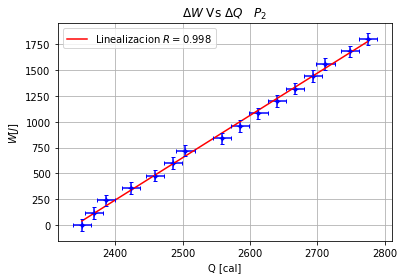

In [144]:
PW1 = 2.
PW2 = 6.
PW3 = 7.7
PW4 = 9.6
t = 300.
ca = 1 # J/(gC)
ma = 65 #g

ta = np.arange(0,320.,20)
T2 = np.array([26.,26.2,26.4,26.8,27.2,27.5,27.7,28.3,28.6,28.9,29.2,29.5,29.8,
              30.0,30.4,30.7])# 6W
T3 =np.array([31.,31.2,31.6,32.0,32.6,33.,33.3,33.6,34.2,34.6,35.,35.5,
             35.6,35.8,36.3,36.8])#7.7W
T4 = np.array([24.2,24.6,25.4,25.9,26.6,27.2,27.3,28.2,28.9,29.6,30.3,
              30.7,31.3,31.4,32.3,32.8]) #9.6W
T1 = np.array([32.3,32.5,32.6,32.7,33.,33.1,33.4,33.6,33.8,33.7,34.1,
              34.2,34.6,34.8,34.9,35.1])

X = ca*(ma+25.4)*T2
Y = ta*PW2
print np.std(X)
plt.plot(X,Y,"b.")
T1Err= np.std(Y)/10; taErr= np.std(X)/10
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
polynomial = np.poly1d([slope, intercept])
line = polynomial(X)
plt.plot(X, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value)) 
plt.errorbar(X, Y, T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("Q [cal]")
plt.ylabel("$W[J]$")
plt.title("$\Delta W$ Vs $\Delta Q$   $P_{2}$")
plt.legend()

print "Equivalencia ", slope, "Errror", Error_linealizacion(X,Y)[1]

plt.savefig("WvsQP2")

163.852922388
Equivalencia  4.32169193295 Errror 1.15792912725


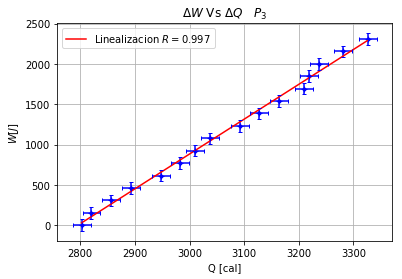

In [146]:
PW1 = 2.
PW2 = 6.
PW3 = 7.7
PW4 = 9.6
t = 300.
ca = 1 # J/(gC)
ma = 65 #g

ta = np.arange(0,320.,20)
T2 = np.array([26.,26.2,26.4,26.8,27.2,27.5,27.7,28.3,28.6,28.9,29.2,29.5,29.8,
              30.0,30.4,30.7])# 6W
T3 =np.array([31.,31.2,31.6,32.0,32.6,33.,33.3,33.6,34.2,34.6,35.,35.5,
             35.6,35.8,36.3,36.8])#7.7W
T4 = np.array([24.2,24.6,25.4,25.9,26.6,27.2,27.3,28.2,28.9,29.6,30.3,
              30.7,31.3,31.4,32.3,32.8]) #9.6W
T1 = np.array([32.3,32.5,32.6,32.7,33.,33.1,33.4,33.6,33.8,33.7,34.1,
              34.2,34.6,34.8,34.9,35.1])

X = ca*(ma+25.4)*T3
Y = ta*PW3
print np.std(X)
plt.plot(X,Y,"b.")
T1Err= np.std(Y)/10; taErr= np.std(X)/10
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
polynomial = np.poly1d([slope, intercept])
line = polynomial(X)
plt.plot(X, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value)) 
plt.errorbar(X, Y, T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("Q [cal]")
plt.ylabel("$W[J]$")
plt.title("$\Delta W$ Vs $\Delta Q$   $P_{3}$")
plt.legend()

print "Equivalencia ", slope, "Errror", Error_linealizacion(X,Y)[1]

plt.savefig("WvsQP3")

44.2975574947
Equivalencia  4.14162428726 Errror 1.11248883274


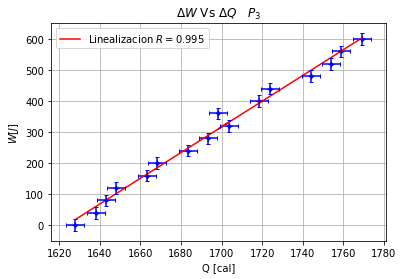

In [163]:
PW1 = 2.
PW2 = 6.
PW3 = 7.7
PW4 = 9.6
t = 300.
ca = 1 # J/(gC)
ma = 65-40 #g

ta = np.arange(0,320.,20)
T2 = np.array([26.,26.2,26.4,26.8,27.2,27.5,27.7,28.3,28.6,28.9,29.2,29.5,29.8,
              30.0,30.4,30.7])# 6W
T3 =np.array([31.,31.2,31.6,32.0,32.6,33.,33.3,33.6,34.2,34.6,35.,35.5,
             35.6,35.8,36.3,36.8])#7.7W
T4 = np.array([24.2,24.6,25.4,25.9,26.6,27.2,27.3,28.2,28.9,29.6,30.3,
              30.7,31.3,31.4,32.3,32.8]) #9.6W
T1 = np.array([32.3,32.5,32.6,32.7,33.,33.1,33.4,33.6,33.8,33.7,34.1,
              34.2,34.6,34.8,34.9,35.1])

X = ca*(ma+25.4)*T1
Y = ta*PW1
print np.std(X)
plt.plot(X,Y,"b.")
T1Err= np.std(Y)/10; taErr= np.std(X)/10
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
polynomial = np.poly1d([slope, intercept])
line = polynomial(X)
plt.plot(X, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value)) 
plt.errorbar(X, Y, T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)

plt.grid(True)
plt.xlabel("Q [cal]")
plt.ylabel("$W[J]$")
plt.title("$\Delta W$ Vs $\Delta Q$   $P_{3}$")
plt.legend()

print "Equivalencia ", slope, "Errror", Error_linealizacion(X,Y)[1]

In [168]:
P = np.array([4.14162,4.08583,4.32169,4.359801])
dP = np.array([1.1124,1.0937,1.1579,1.16765])

print "promedio", np.mean(P)
print "error", np.mean(dP)

promedio 4.22723525
error 1.1329125
